***Graph Mining - ALTEGRAD - Nov 2022***

PAUL CHAUVIN 

paulchauvin97@gmail.com


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import eigs
from scipy.sparse import diags, eye
from random import randint
import sklearn.metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
from sklearn.preprocessing import normalize
from sklearn .svm import SVC

Graph with 9877 nodes and 25998 edges


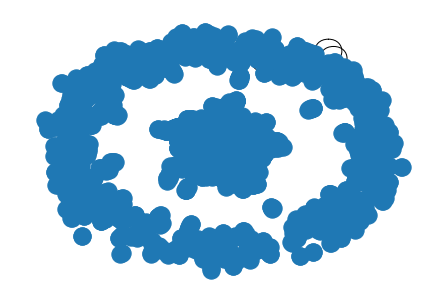

In [ ]:
############## Task 1
G = nx.read_edgelist(path='/content/drive/MyDrive/Cours MVA/ALTEGRAD/Lab4/ca-HepTh.txt',
                     comments='#',
                     delimiter='\t',
                     data=True)
print(G)
nx.draw(G)

In [ ]:
############## Task 2
def connected_components(G):
    cc_list = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    largest_cc = max(nx.connected_components(G), key=len)
    G_largest_cc = G.subgraph(largest_cc)
    nb_edges_largest_cc = G_largest_cc.number_of_edges()
    nb_nodes_largest_cc = G_largest_cc.number_of_nodes()
    nb_edges_total = G.number_of_edges()
    nb_nodes_total = G.number_of_nodes()
    return "There are " + str(len(cc_list)) + " connected components in the graph. The largest connected components has "+ str(nb_nodes_largest_cc) + " nodes ("+str(int(100*(nb_nodes_largest_cc/G.number_of_nodes())))+"% of total) and " + str(nb_edges_largest_cc) + " edges ("+str(int(100*(nb_edges_largest_cc/G.number_of_edges()))) +"% of total)."

connected_components(G)

'There are 429 connected components in the graph. The largest connected components has 8638 nodes (87% of total) and 24827 edges (95% of total).'

In [ ]:
############## Task 3
degree_sequence = [G.degree(node) for node in G.nodes()]
print("The maximum degree of the nodes in the graph is ", "%.2f" %max([elem for elem in degree_sequence]))
print("The minimum degree of the nodes in the graph is ", "%.2f" %min([elem for elem in degree_sequence]))
print("The mean degree of the nodes in the graph is ", "%.2f" %np.mean([elem for elem in degree_sequence]))

The maximum degree of the nodes in the graph is  65.00
The minimum degree of the nodes in the graph is  1.00
The mean degree of the nodes in the graph is  5.26


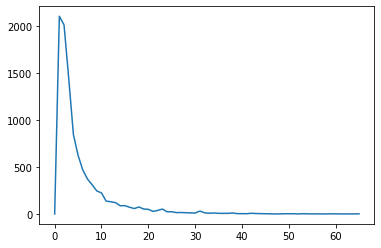

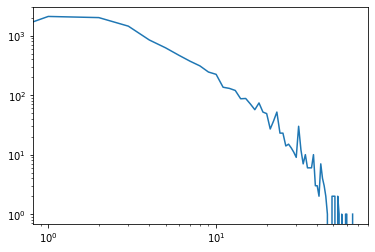

In [ ]:
############## Task 4
degree_hist = nx.degree_histogram(G)
X = np.arange(0,66,1)
plt.plot(X,degree_hist)
plt.figure()
plt.loglog(X,degree_hist)

In [ ]:
############## Task 5
print('The global clustering coefficient is ',"%.2f" %nx.transitivity(G))

The global clustering coefficient is  0.28


In [ ]:
############## Task 6
# Perform spectral clustering to partition graph G into k clusters
def spectral_clustering(G, k):
    m = len(G.nodes)
    A = nx.to_numpy_array(G)
    degree_sequence = [G.degree(node) for node in G.nodes()]
    D = np.diag(degree_sequence)
    #Dinv = np.([1/d if d!=0 else 0. for d in degree_sequence])
    L = np.eye(m) - np.linalg.inv(D) @ A# Dinv@A
    _,eig_vec = eigs(L,k=k,which="SM")
    eig_vec = np.real(eig_vec) 
    y_pred = KMeans(n_clusters=k, random_state=0).fit_predict(normalize(eig_vec))
    clustering = dict((i,x) for i,x in enumerate(y_pred))
    return clustering

A clustering for a 100 nodes path:
{0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 7, 20: 7, 21: 7, 22: 7, 23: 7, 24: 7, 25: 7, 26: 7, 27: 7, 28: 7, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4, 51: 5, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 3, 63: 3, 64: 3, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 9, 73: 9, 74: 9, 75: 9, 76: 9, 77: 9, 78: 9, 79: 9, 80: 9, 81: 9, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 8, 93: 8, 94: 8, 95: 8, 96: 8, 97: 8, 98: 8, 99: 8}


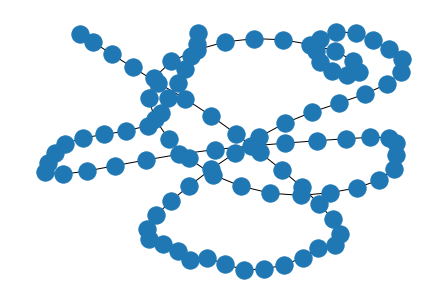

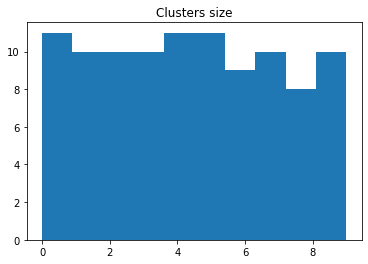

In [ ]:
path100 = nx.path_graph(100)
plt.figure()
nx.draw(path100)
print("A clustering for a 100 nodes path:")
sp_clust_path100 = spectral_clustering(path100,10)
print(sp_clust_path100)
plt.figure()
plt.hist(sp_clust_path100.values())
plt.title("Clusters size")
plt.show()

In [ ]:
############## Task 7
largest_cc = max(nx.connected_components(G), key=len)
G_largest_cc = G.subgraph(largest_cc)
fifty_clusters=spectral_clustering(G_largest_cc, 50)


{0: 34, 1: 34, 2: 34, 3: 34, 4: 34, 5: 34, 6: 34, 7: 34, 8: 34, 9: 2, 10: 34, 11: 34, 12: 34, 13: 34, 14: 34, 15: 34, 16: 34, 17: 34, 18: 34, 19: 34, 20: 34, 21: 19, 22: 34, 23: 44, 24: 34, 25: 19, 26: 34, 27: 30, 28: 34, 29: 34, 30: 42, 31: 34, 32: 34, 33: 34, 34: 34, 35: 34, 36: 34, 37: 0, 38: 34, 39: 34, 40: 34, 41: 3, 42: 0, 43: 44, 44: 34, 45: 44, 46: 42, 47: 42, 48: 42, 49: 34, 50: 2, 51: 34, 52: 2, 53: 34, 54: 34, 55: 34, 56: 34, 57: 14, 58: 34, 59: 34, 60: 34, 61: 34, 62: 34, 63: 34, 64: 42, 65: 34, 66: 34, 67: 34, 68: 34, 69: 34, 70: 34, 71: 27, 72: 34, 73: 34, 74: 34, 75: 34, 76: 34, 77: 34, 78: 34, 79: 0, 80: 34, 81: 34, 82: 34, 83: 34, 84: 42, 85: 34, 86: 44, 87: 34, 88: 24, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 44, 95: 0, 96: 21, 97: 34, 98: 34, 99: 44, 100: 44, 101: 0, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 34, 108: 2, 109: 34, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 22, 121: 2, 122: 2, 123: 2, 124: 34, 125: 34, 126: 34,

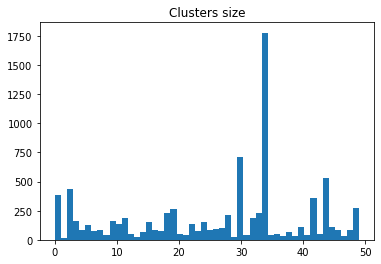

In [ ]:
print(fifty_clusters)
plt.figure()
plt.hist(fifty_clusters.values(),bins=50)
plt.title("Clusters size")
plt.show()

In [ ]:
############## Task 8
# Compute modularity value from graph G based on clustering
def modularity(G, clustering):
    m = G.number_of_nodes()
    k = max(clustering.values())+1
    modularity = 0.
    #number of edge for each community 
    l_c = np.zeros(k)
    #sum of degrees for each community
    d_c = np.zeros(k)
    for i in range(m):
      l_c[clustering[i]] += len(G.edges(str(i)))
      d_c[clustering[i]] += G.degree(str(i))
    modularity = sum(l_c/m - (d_c/m)**2)
    return modularity

In [ ]:
############## Task 9
G = nx.read_edgelist(path='/content/drive/MyDrive/Cours MVA/ALTEGRAD/Lab4/ca-HepTh.txt',
                     comments='#',
                     delimiter='\t',
                     data=True)
##1st question 
modularity(G_largest_cc,fifty_clusters)

##2nd question
treshold = random.rand(1,nx.numbers_of_nodes(G))
print(treshold)
dict_bool = {"True":0,"False":1}
num_nodes = nx.numbers_of_nodes(G)
rand_cluster = dict((i,i) for i in [0]) #(i,dict_bool[str(i <= treshold)])
print("modularity for a random bipartition :",modularity(G, rand_cluster))


ValueError: ignored

In [ ]:
############## Task 10
def create_dataset():
    Gs = list()
    y = list()
    for i in range (3, 103): 
      Gs.append(nx.cycle_graph(i))
      Gs.append(nx.path_graph(i))
      y.append(0)
      y.append(1)
    return Gs, y

Gs, y = create_dataset()
G_train, G_test, y_train, y_test = train_test_split(Gs, y, test_size=0.1)

Example of a path graph
Graph with 32 nodes and 31 edges


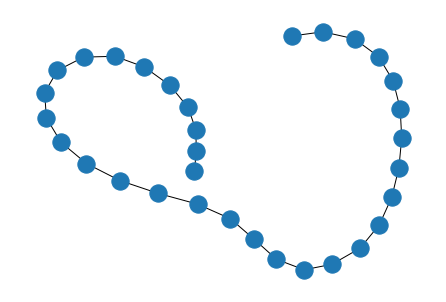

In [ ]:
print('Example of a path graph')
nx.draw(Gs[59])
print(Gs[59])

Example of a cycle graph
Graph with 33 nodes and 33 edges


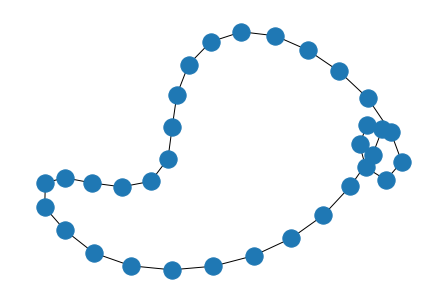

In [ ]:
print('Example of a cycle graph')
nx.draw(Gs[60])
print(Gs[60])

In [ ]:
# Compute the shortest path kernel
def shortest_path_kernel(Gs_train, Gs_test):
    all_paths = dict()
    sp_counts_train = dict()

    for i, G in enumerate(Gs_train):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_train[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_train[i]:
                        sp_counts_train[i][length] += 1
                    else:
                        sp_counts_train[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)

    sp_counts_test = dict()

    for i, G in enumerate(Gs_test):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_test[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_test[i]:
                        sp_counts_test[i][length] += 1
                    else:
                        sp_counts_test[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)

    phi_train = np.zeros((len(Gs_train), len(all_paths)))
    for i in range(len(Gs_train)):
        for length in sp_counts_train[i]:
            phi_train[i, all_paths[length]] = sp_counts_train[i][length]

    phi_test = np.zeros((len(Gs_test), len(all_paths)))
    for i in range(len(Gs_test)):
        for length in sp_counts_test[i]:
            phi_test[i, all_paths[length]] = sp_counts_test[i][length]

    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test

In [ ]:
############## Task 11
# Compute the graphlet kernel
def graphlet_kernel(Gs_train, Gs_test, n_samples=200): #used to be Gs_train and Gs_test
    graphlets = [nx.Graph(), nx.Graph(), nx.Graph(), nx.Graph()]

    graphlets[0].add_nodes_from(range(3))

    graphlets[1].add_nodes_from(range(3))
    graphlets[1].add_edge(0, 1)

    graphlets[2].add_nodes_from(range(3))
    graphlets[2].add_edge(0, 1)
    graphlets[2].add_edge(1, 2)

    graphlets[3].add_nodes_from(range(3))
    graphlets[3].add_edge(0, 1)
    graphlets[3].add_edge(1, 2)
    graphlets[3].add_edge(0, 2)
###########################################

    phi_train = np.zeros((len(Gs_train), 4))
    for i in range(0, len(Gs_train)):
      s=np.random.choice(nx.nodes(Gs_train[i]), 3)
      for j in range (0,4):
        if  (nx.is_isomorphic(nx.subgraph(Gs_train[i],s), graphlets[j])==True):
          phi_train[i][j]=1

    phi_test = np.zeros((len(Gs_test), 4))
    for i in range(0, len(Gs_test)):
      s=np.random.choice(nx.nodes(Gs_test[i]), 3)
      for j in range (0,4):
        if  (nx.is_isomorphic(nx.subgraph(Gs_test[i],s), graphlets[j])==True):
          phi_test[i][j]=1
###########################################
    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test


In [ ]:
############## Task 12
K_train_sp, K_test_sp = shortest_path_kernel(G_train, G_test)
K_train_gk, K_test_gk = graphlet_kernel(G_train, G_test, n_samples=200)
print("K_train_sp", K_train_sp)
print("K_test_sp", K_test_sp)
print("K_train_gk", K_train_gk) 
print("K_test_gk", K_test_gk)

K_train_sp [[  15200.   24860.   37440. ...   27300.   72540.   61520.]
 [  24860.   66193.  113424. ...   67935.  251193.  193140.]
 [  37440.  113424.  216576. ...  115920.  424080.  327744.]
 ...
 [  27300.   67935.  115920. ...   84525.  224595.  181440.]
 [  72540.  251193.  424080. ...  224595. 1600065. 1043088.]
 [  61520.  193140.  327744. ...  181440. 1043088.  783272.]]
K_test_sp [[  29640.   78014.  136800. ...   91770.  265050.  211964.]
 [  30320.   85100.  145344. ...   84840.  356004.  264792.]
 [  39780.  124287.  232560. ...  123165.  479043.  366384.]
 ...
 [  35880.  106214.  200928. ...  111090.  389298.  302956.]
 [  75660.  261997.  442320. ...  234255. 1668885. 1116276.]
 [  14060.   22591.   33744. ...   24605.   65379.   55632.]]
K_train_gk [[1. 1. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]]
K_test_gk [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 

In [ ]:
############## Task 13

##Shortest_Path ##################################
clf_sp = SVC(kernel="precomputed") 
clf_sp.fit(K_train_sp, y_train)
  
# Prediction with Shortest_Path
y_pred_sp = clf_sp.predict(K_test_sp)

#Evaluate accuracy for Shortest Path 
accuracy_sp=sklearn.metrics.accuracy_score(y_test, y_pred_sp)
print('accuracy_short_path =', accuracy_sp)


##Graphlets #####################################
clf_gk = SVC(kernel="precomputed") 
clf_gk.fit(K_train_gk, y_train)
  
#Predictions with Graphlets
y_pred_gk = clf_gk.predict(K_test_gk)

#Evaluate accuracy for Graphlets
accuracy_gk=sklearn.metrics.accuracy_score(y_test, y_pred_gk)
print('accuracy_graphlets =', accuracy_gk)

accuracy_short_path = 1.0
accuracy_graphlets = 0.45


Conclusion: graphlets is not a proper model, whereas shortest path works really well ! 